# Titanic Survival Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data into DataFrame

In [48]:
train = pd.read_csv("D:/Machine Learning/Machine Learning/Datasets/Titanic/train.csv")
test = pd.read_csv("D:/Machine Learning/Machine Learning/Datasets/Titanic/test.csv")

In [ ]:
passengerId = test.iloc[:,0].values

In [49]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [50]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [51]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Drop Column `Cabin` as we have less than 30% values for the column

In [54]:
train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)

In [55]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [56]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Let's find maximum embark value

In [57]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Filling null columns with `'S'` as it is maximum

In [58]:
train['Embarked'].fillna('S', inplace=True)

C:\Users\ask50\AppData\Local\Temp\ipykernel_9948\1021043716.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S', inplace=True)


In [59]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

Same way fill in test

In [60]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [61]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

C:\Users\ask50\AppData\Local\Temp\ipykernel_9948\4105841904.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].mean(), inplace=True)


In [62]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [63]:
train_age = np.random.randint(train['Age'].mean() - train['Age'].std(), train['Age'].mean() + train['Age'].std(), 177)
test_age = np.random.randint(test['Age'].mean() - test['Age'].std(), test['Age'].mean() + test['Age'].std(), 86)

In [64]:
train['Age'][train['Age'].isnull()] = train_age
test['Age'][test['Age'].isnull()] = test_age

C:\Users\ask50\AppData\Local\Temp\ipykernel_9948\4065066975.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['Age'][train['Age'].isnull()] = train_age
C:\Users\ask50\AppData\Local\Temp\ipykernel_9948\4065066975.py:1: SettingWithCopy

In [67]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [68]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### EDA Stage

In [69]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [79]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [83]:
136 / (80+136) * 100 # The change of survival for class 1

62.96296296296296

Here we found that as class decreases chance of survival also decreases.

In [84]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [85]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

C:\Users\ask50\AppData\Local\Temp\ipykernel_9948\3826302481.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
C:\Users\ask50\AppData\Local\Temp\ipykernel_9948\3826302481.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==1])


<Axes: xlabel='Age', ylabel='Density'>

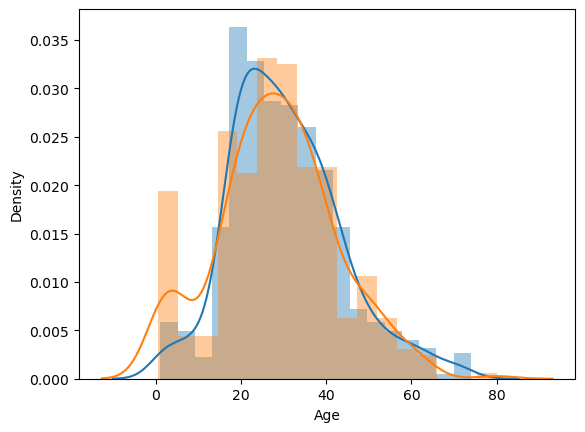

In [88]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

C:\Users\ask50\AppData\Local\Temp\ipykernel_9948\2626582821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0])
C:\Users\ask50\AppData\Local\Temp\ipykernel_9948\2626582821.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==1]

<Axes: xlabel='Fare', ylabel='Density'>

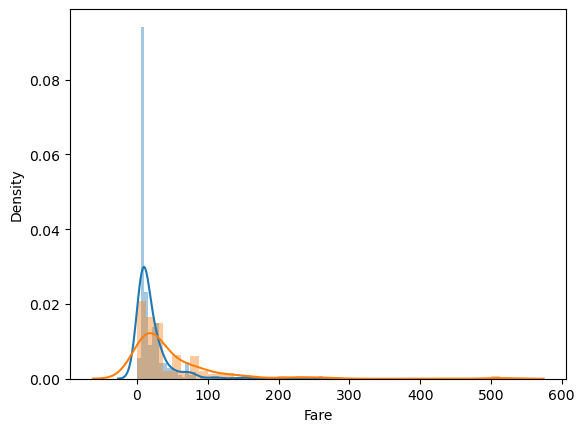

In [90]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

Removing Name and Ticket

In [93]:
train.drop(columns=['Name', 'Ticket'], inplace=True)
test.drop(columns=['Name', 'Ticket'], inplace=True)

Combine `SibSp` and `Parch` and make a family column

In [97]:
train['Family'] = train['SibSp'] + train['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

In [100]:
train.drop(columns=['SibSp', 'Parch'], inplace=True)

In [134]:
test.drop(columns=['SibSp', 'Parch'], inplace=True)

In [102]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,1,0,3,male,22.0,7.2500,S,2
1,2,1,1,female,38.0,71.2833,C,2
2,3,1,3,female,26.0,7.9250,S,1
3,4,1,1,female,35.0,53.1000,S,2
4,5,0,3,male,35.0,8.0500,S,1


In [103]:
train.groupby(['Family'])['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

Categorise Family into three parts `alone`, `medimum` & `large`

In [104]:
def cal(number):
    if number == 1:
        return 'alone'
    elif number > 1 and number <= 4:
        return 'medium'
    else:
        return 'large'

In [107]:
train['Family_size'] = train['Family'].apply(cal)
test['Family_size'] = test['Family'].apply(cal)

In [108]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_size
0,892,3,male,34.5,0,0,7.8292,Q,1,alone
1,893,3,female,47.0,1,0,7.0000,S,2,medium
2,894,2,male,62.0,0,0,9.6875,Q,1,alone
3,895,3,male,27.0,0,0,8.6625,S,1,alone
4,896,3,female,22.0,1,1,12.2875,S,3,medium
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,26.0,0,0,8.0500,S,1,alone
414,1306,1,female,39.0,0,0,108.9000,C,1,alone
415,1307,3,male,38.5,0,0,7.2500,S,1,alone
416,1308,3,male,25.0,0,0,8.0500,S,1,alone


In [ ]:
train.drop(columns=['Family'], inplace=True)
test.drop(columns=['Family'], inplace=True)

In [113]:
train.drop(columns=['PassengerId'], inplace=True)
test.drop(columns=['PassengerId'], inplace=True)

In [114]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,male,22.0,7.2500,S,medium
1,1,1,female,38.0,71.2833,C,medium
2,1,3,female,26.0,7.9250,S,alone
3,1,1,female,35.0,53.1000,S,medium
4,0,3,male,35.0,8.0500,S,alone


Categorical values into numerical values

In [ ]:
train = pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked', 'Family_size'], drop_first=True)

In [120]:
test = pd.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked', 'Family_size'], drop_first=True)

In [119]:
train.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_large,Family_size_medium
0,0,22.0,7.2500,False,True,True,False,True,False,True
1,1,38.0,71.2833,False,False,False,False,False,False,True
2,1,26.0,7.9250,False,True,False,False,True,False,False
3,1,35.0,53.1000,False,False,False,False,True,False,True
4,0,35.0,8.0500,False,True,True,False,True,False,False


In [132]:
train.shape

(891, 10)

Split Features and Label

In [136]:
test.shape

(418, 9)

In [122]:
X = train.iloc[:, 1:].values
y = train.iloc[:, 0].values

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
from sklearn.tree import DecisionTreeClassifier

decision_clf = DecisionTreeClassifier()
decision_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [127]:
y_pred = decision_clf.predict(X_test)

In [128]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7653631284916201

Prediction for test values

In [137]:
X_final = test.iloc[:,:].values

In [138]:
y_pred_final = decision_clf.predict(X_final)

Preparing dataFrame for submission

In [154]:
final = pd.DataFrame()

final['passengerId'] = passengerId
final['survived'] = y_pred_final

In [155]:
final

,passengerId,survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [156]:
final.to_csv('titanic_submission.csv', index=False)